# import

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import warnings

warnings.filterwarnings('ignore')

from datetime import datetime

# 데이터 로딩 

In [2]:
# 기상청 3년치 날씨 데이터
df=pd.read_csv('./weather_0608.csv', encoding='cp949')

df.shape

(104040, 7)

# 데이터 전처리

In [3]:
# 데이터 인포 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104040 entries, 0 to 104039
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   지점          104040 non-null  int64  
 1   지점명         104040 non-null  object 
 2   일시          104040 non-null  object 
 3   평균기온(°C)    103946 non-null  float64
 4   최저기온(°C)    104018 non-null  float64
 5   최고기온(°C)    104016 non-null  float64
 6   평균 풍속(m/s)  103920 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 5.6+ MB


In [4]:
# 일시 object -> datetimme으로 바꾸기
df['일시']=pd.to_datetime(df['일시'], format="%Y-%m-%d")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104040 entries, 0 to 104039
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   지점          104040 non-null  int64         
 1   지점명         104040 non-null  object        
 2   일시          104040 non-null  datetime64[ns]
 3   평균기온(°C)    103946 non-null  float64       
 4   최저기온(°C)    104018 non-null  float64       
 5   최고기온(°C)    104016 non-null  float64       
 6   평균 풍속(m/s)  103920 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 5.6+ MB


## 결측치 처리

In [5]:
# 데이터 컬럼명 확인
df.columns

Index(['지점', '지점명', '일시', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '평균 풍속(m/s)'], dtype='object')

In [6]:
# 분석에 사용할 사용 안 할 컬럼 drop
df_ = df.drop('지점', axis=1)

In [7]:
# 분석에 사용할 데이터 확인
df_.info()
# df_.describe()  #  정수/실수 타입 컬럼 정보 조회

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104040 entries, 0 to 104039
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   지점명         104040 non-null  object        
 1   일시          104040 non-null  datetime64[ns]
 2   평균기온(°C)    103946 non-null  float64       
 3   최저기온(°C)    104018 non-null  float64       
 4   최고기온(°C)    104016 non-null  float64       
 5   평균 풍속(m/s)  103920 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 4.8+ MB


In [8]:
df_

,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s)
0,속초,2020-06-08,22.8,16.7,29.4,1.9
1,속초,2020-06-09,25.0,20.4,32.0,1.3
2,속초,2020-06-10,24.2,19.6,29.6,1.7
3,속초,2020-06-11,24.7,21.9,29.1,1.8
4,속초,2020-06-12,20.4,19.3,22.3,1.1
...,...,...,...,...,...,...
104035,남해,2023-06-03,22.2,17.1,27.3,1.2
104036,남해,2023-06-04,23.1,16.4,28.2,1.1
104037,남해,2023-06-05,22.3,18.4,26.6,1.1
104038,남해,2023-06-06,20.5,17.4,25.1,1.1


결측치 처리
- 기온 결측치 삭제



In [9]:
df_.isnull().sum() #결측치 확인

지점명             0
일시              0
평균기온(°C)       94
최저기온(°C)       22
최고기온(°C)       24
평균 풍속(m/s)    120
dtype: int64

In [11]:
# 나머지 데이터는 .. 다 버릴까
df_.dropna(inplace=True)
df_.isnull().sum() #결측치 확인

지점명           0
일시            0
평균기온(°C)      0
최저기온(°C)      0
최고기온(°C)      0
평균 풍속(m/s)    0
dtype: int64

## 파생변수로 추가

In [12]:
X = df_

체감온도 계산

In [13]:
X['체감 기온(°C)'] = 13.12 + 0.6215 * X['평균기온(°C)'] - 11.37 * X['평균 풍속(m/s)']**0.16 + 0.3965 * X['평균기온(°C)'] * X['평균 풍속(m/s)']**0.16

계절감 추가

In [14]:
import pandas as pd
from datetime import datetime
import numpy as np

dfs = []  # 데이터프레임을 저장할 리스트

for i in [2020, 2021, 2022, 2023]:
    # 시작 날짜와 끝 날짜 설정
    start_date = datetime(i, 1, 1)
    end_date = datetime(i, 12, 31)

    # 날짜 범위 생성
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    # x 값 범위 설정
    x = np.linspace(0, len(date_range), len(date_range))

    # y 값 계산
    y = np.sin((2 * np.pi * x) / len(date_range))

    # 데이터프레임 생성
    df = pd.DataFrame({'x': date_range, 'y': y})
    dfs.append(df)  # 데이터프레임을 리스트에 추가

# 모든 데이터프레임을 하나로 합치기
combined_df = pd.concat(dfs, ignore_index=True)

X['sin'] = None

# 각 행을 순회하며 조건과 비교하여 열 추가
for index, row in X.iterrows():
    mask = combined_df['x'] == row['일시']
    if any(mask):  # 조건에 맞는 행이 하나 이상 있는지 확인
        X.loc[index, 'sin'] = combined_df.loc[mask, 'y'].values[0]
    else:
        pass

In [15]:
# 새로운 열 초기화
X['sin'] = None

# 각 행을 순회하며 조건과 비교하여 열 추가
for index, row in X.iterrows():
    mask = combined_df['x'] == row['일시']
    if any(mask):  # 조건에 맞는 행이 하나 이상 있는지 확인
        X.loc[index, 'sin'] = combined_df.loc[mask, 'y'].values[0]
    else:
        pass

In [17]:
# 확인용
X[X['일시']=='2022-9-30']

,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s),체감 기온(°C),sin
844,속초,2022-09-30,21.5,13.8,27.5,1.6,23.414785,-0.999851
1939,북춘천,2022-09-30,17.0,12.4,25.5,0.7,19.312799,-0.999851
3034,철원,2022-09-30,16.4,8.9,25.8,0.7,18.715195,-0.999851
4129,동두천,2022-09-30,17.8,11.1,26.6,0.5,20.323083,-0.999851
5224,파주,2022-09-30,16.8,11.5,26.0,0.5,19.346706,-0.999851
...,...,...,...,...,...,...,...,...
99409,합천,2022-09-30,18.8,11.5,29.6,0.5,21.299461,-0.999851
100504,밀양,2022-09-30,20.2,13.8,29.6,0.6,22.577352,-0.999851
101599,산청,2022-09-30,18.4,10.8,28.9,0.5,20.908910,-0.999851
102694,거제,2022-09-30,20.3,15.5,27.4,0.7,22.599619,-0.999851


In [19]:
X=X.drop(['일시', '평균기온(°C)'], axis=1)

In [20]:
X['dif'] = X['최저기온(°C)'] - X['최고기온(°C)']

In [21]:
# 평균 풍속과 체감기온의 차이 확인용
X[X['평균 풍속(m/s)']> 10]

,지점명,최저기온(°C),최고기온(°C),평균 풍속(m/s),체감 기온(°C),sin,dif
6008,대관령,-8.4,-2.5,10.9,-10.036727,-0.609902,-5.9
6329,대관령,2.0,6.7,10.8,2.009628,-0.987957,-4.7
7802,백령도,9.1,11.8,10.4,8.564140,-0.927542,-2.7
7869,백령도,-7.9,4.9,11.3,-5.930465,-0.034422,-12.8
7870,백령도,-10.0,-5.9,12.1,-13.765016,-0.017213,-4.1
...,...,...,...,...,...,...,...
47057,고산,8.3,14.2,11.1,9.053429,0.996278,-5.9
47058,고산,7.7,14.6,10.8,9.460278,0.994642,-6.9
47066,고산,10.2,16.9,10.3,12.891179,0.970942,-6.7
47084,고산,15.0,18.7,10.2,17.570819,0.851284,-3.7


그래프 그릴시 한글이 깨지는 오류를 못 잡음
그래서 영어로 그냥 변경

In [22]:
# 컬럼 이름 변경
X.rename(columns={'지점명': 'area'}, inplace=True)
X.rename(columns={'최저기온(°C)': 'row_tmp'}, inplace=True)
X.rename(columns={'최고기온(°C)': 'top_tmp'}, inplace=True)
X.rename(columns={'평균 풍속(m/s)': 'av_wsd'}, inplace=True)
X.rename(columns={'체감 기온(°C)': 'ap_tmp'}, inplace=True)

 - 전처리 과정이 조금 오래걸리니 파일로 저장해 둠

In [23]:
import pandas as pd

# CSV 파일로 저장
X.to_csv('pro_weather_0608.csv', index=False)


# 모델링

## import

In [24]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import warnings

warnings.filterwarnings('ignore')

from datetime import datetime

In [25]:
X_=pd.read_csv('./pro_weather_0608.csv')
X_.shape

(103825, 7)

In [26]:
X_

,area,row_tmp,top_tmp,av_wsd,ap_tmp,sin,dif
0,속초,16.7,29.4,1.9,24.708420,0.393590,-12.7
1,속초,20.4,32.0,1.3,27.137514,0.377708,-11.6
2,속초,19.6,29.6,1.7,26.228346,0.361714,-10.0
3,속초,21.9,29.1,1.8,26.739146,0.345612,-7.2
4,속초,19.3,22.3,1.1,22.466776,0.329408,-3.0
...,...,...,...,...,...,...,...
103820,남해,17.1,27.3,1.2,24.273593,0.479937,-10.2
103821,남해,16.4,28.2,1.1,25.231827,0.464723,-11.8
103822,남해,18.4,26.6,1.1,24.412553,0.449370,-8.2
103823,남해,17.4,25.1,1.1,22.569186,0.433884,-7.7


## 스케일링

### 컬럼 선택

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
X_.columns

Index(['area', 'row_tmp', 'top_tmp', 'av_wsd', 'ap_tmp', 'sin', 'dif'], dtype='object')

In [29]:
cols=['row_tmp', 'top_tmp', 'av_wsd', 'ap_tmp', 'sin', 'dif']

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_[cols])
X_[cols] = X_scaled
X_.head()

,area,row_tmp,top_tmp,av_wsd,ap_tmp,sin,dif
0,속초,0.775646,1.125846,-0.007090,0.969046,0.556963,-0.584718
1,속초,1.131829,1.402871,-0.444806,1.208421,0.534472,-0.328385
2,속초,1.054816,1.147156,-0.152996,1.118827,0.511823,0.044463
3,속초,1.276227,1.093881,-0.080043,1.169164,0.489022,0.696947
4,속초,1.025936,0.369354,-0.590711,0.748143,0.466076,1.675673


분석

In [31]:
df_area = X_['area']

In [32]:
X=X_.drop(['area', 'top_tmp', 'row_tmp', 'av_wsd'], axis=1)

In [33]:
# X=X.drop(['lable','일시'], axis=1)

In [34]:
X.head()

,ap_tmp,sin,dif
0,0.969046,0.556963,-0.584718
1,1.208421,0.534472,-0.328385
2,1.118827,0.511823,0.044463
3,1.169164,0.489022,0.696947
4,0.748143,0.466076,1.675673


In [35]:
# X=X.drop('dif', axis=1)

### k값

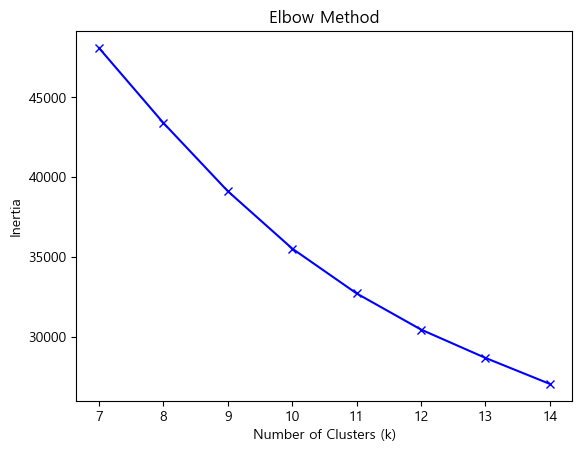

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 데이터 준비

# 클러스터의 개수(k) 범위 설정
k_values = range(7, 15)
inertia_values = []

# k 값에 따른 비용 함수(inertia) 계산
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# 엘보우 그래프 그리기
plt.plot(k_values, inertia_values, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

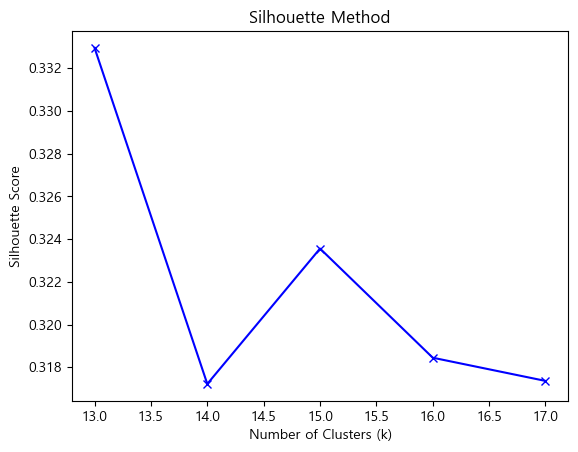

In [347]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 데이터 준비

# 가중치 설정
weights = [0.8, 0.1, 0.1]  # 각 열에 대한 가중치 설정

# 데이터셋에 가중치 적용
weighted_data = X * weights

# 클러스터의 개수(k) 범위 설정
k_values = range(13, 18)
silhouette_scores = []

# k 값에 따른 실루엣 계수 계산
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(weighted_data)
    labels = kmeans.labels_
    score = silhouette_score(weighted_data, labels)
    silhouette_scores.append(score)

# 실루엣 계수 그래프 그리기
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

In [36]:
from sklearn.cluster import KMeans

# 가중치 설정
weights = [0.8, 0.1, 0.1]  # 각 열에 대한 가중치 설정

# KMeans 모델 초기화
km_model = KMeans(n_clusters=15, random_state=0)

# 데이터셋에 가중치 적용
weighted_data = X * weights

# 클러스터링 모델 훈련
kmeans_model = km_model.fit(weighted_data)

# 클러스터링 결과 확인
labels = kmeans_model.labels_
centroids = kmeans_model.cluster_centers_

# 결과 출력 또는 저장 등 추가 작업 수행
print("Labels:", labels)
print("Centroids:", centroids)


Labels: [ 1 10 10 ...  1  1  1]
Centroids: [[-0.88280105  0.02978347 -0.01872751]
 [ 0.60390606  0.07304512 -0.02735678]
 [-0.01075118  0.12943052 -0.06090277]
 [ 1.16514328 -0.06503417  0.04679455]
 [-1.9612118   0.01892859  0.00864707]
 [-0.61087104  0.03577766 -0.02104341]
 [ 0.38436197 -0.12670662  0.02200717]
 [-1.49277569  0.02724235  0.00348868]
 [ 0.01311924 -0.12200708 -0.01755076]
 [-0.30478487 -0.10646721 -0.05622774]
 [ 0.90728505 -0.04678806  0.04839631]
 [ 0.29935072  0.10804882 -0.0162329 ]
 [ 0.67961115 -0.09204719  0.07249254]
 [-0.31777708  0.12711137 -0.0320293 ]
 [-1.1650001   0.0286974  -0.00596318]]


In [37]:
df_['label'] = labels

In [38]:
# df_ 데이터랑 라벨값 확인
df_

,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s),체감 기온(°C),sin,label
0,속초,2020-06-08,22.8,16.7,29.4,1.9,24.708420,0.39359,1
1,속초,2020-06-09,25.0,20.4,32.0,1.3,27.137514,0.377708,10
2,속초,2020-06-10,24.2,19.6,29.6,1.7,26.228346,0.361714,10
3,속초,2020-06-11,24.7,21.9,29.1,1.8,26.739146,0.345612,10
4,속초,2020-06-12,20.4,19.3,22.3,1.1,22.466776,0.329408,12
...,...,...,...,...,...,...,...,...,...
104035,남해,2023-06-03,22.2,17.1,27.3,1.2,24.273593,0.479937,1
104036,남해,2023-06-04,23.1,16.4,28.2,1.1,25.231827,0.464723,10
104037,남해,2023-06-05,22.3,18.4,26.6,1.1,24.412553,0.44937,1
104038,남해,2023-06-06,20.5,17.4,25.1,1.1,22.569186,0.433884,1


In [42]:
import pandas as pd

# CSV 파일로 저장
df_.to_csv('pre_weather_0608.csv', index=False)

In [41]:
for i in range(15):
    print(i)
    print(df_[df_['label'] ==i ]['체감 기온(°C)'].agg(['min', 'max']))

0
min    1.771912
max    5.443173
Name: 체감 기온(°C), dtype: float64
1
min    20.539813
max    25.436646
Name: 체감 기온(°C), dtype: float64
2
min    12.533076
max    17.210184
Name: 체감 기온(°C), dtype: float64
3
min    27.950706
max    36.046959
Name: 체감 기온(°C), dtype: float64
4
min   -24.463885
max    -7.019395
Name: 체감 기온(°C), dtype: float64
5
min    5.359450
max    9.301334
Name: 체감 기온(°C), dtype: float64
6
min    17.176147
max    22.029833
Name: 체감 기온(°C), dtype: float64
7
min   -7.034803
max   -1.946492
Name: 체감 기온(°C), dtype: float64
8
min    12.747006
max    17.611821
Name: 체감 기온(°C), dtype: float64
9
min     8.313641
max    13.237162
Name: 체감 기온(°C), dtype: float64
10
min    24.592529
max    28.103247
Name: 체감 기온(°C), dtype: float64
11
min    16.343184
max    20.731641
Name: 체감 기온(°C), dtype: float64
12
min    21.218947
max    25.275010
Name: 체감 기온(°C), dtype: float64
13
min     8.672400
max    13.011811
Name: 체감 기온(°C), dtype: float64
14
min   -2.031915
max    1.983477
Name: 체감 기온(°C)

In [65]:
df_[(df_['일시'] =='2022-7-25') & (df_['지점명']=='속초')]

,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s),label
427,속초,2022-07-25,23.6,21.3,26.4,1.5,4


In [55]:
df_[(df_['label'] ==11) & (df_['지점명']=='속초')][30:]

,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s),label
114,속초,2021-09-15,21.7,18.8,25.5,1.9,11
115,속초,2021-09-16,20.7,17.3,25.2,1.3,11
116,속초,2021-09-17,21.3,19.0,24.7,1.4,11
117,속초,2021-09-18,21.2,18.6,24.6,1.6,11
118,속초,2021-09-19,20.8,17.2,24.2,1.2,11
119,속초,2021-09-20,21.4,16.8,26.4,1.9,11
120,속초,2021-09-21,22.5,18.5,28.8,1.2,11
121,속초,2021-09-22,22.8,20.3,26.5,2.6,11
122,속초,2021-09-23,21.4,17.1,26.1,2.0,11
132,속초,2021-10-03,22.3,16.9,27.4,1.4,11


In [357]:
df_[(df_['일시']== '2023-02-06' ) & (df_['지점명']=='진주')].head(20)

,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s),체감 기온(°C),sin,label
33492,진주,2023-02-06,1.5,-7.7,10.8,0.4,4.746381,0.582185,1


In [352]:
df_[(df_['label']== 9) &(df_['지점명']=='진주')].tail(20)

,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s),체감 기온(°C),sin,label
33466,진주,2023-01-11,2.7,-4.9,14.1,0.3,6.303245,0.171759,9
33467,진주,2023-01-12,5.2,-5.0,15.3,0.4,8.312924,0.188738,9
33470,진주,2023-01-15,4.1,-1.3,7.3,0.8,6.265565,0.239316,9
33487,진주,2023-02-01,4.8,-2.5,15.1,1.4,6.112781,0.509933,9
33493,진주,2023-02-07,4.1,-4.7,15.2,0.5,6.946712,0.596132,9
33494,진주,2023-02-08,4.4,-4.2,13.8,0.8,6.566793,0.609902,9
33495,진주,2023-02-09,4.4,-3.7,11.3,1.2,5.944278,0.62349,9
33497,진주,2023-02-11,2.9,-3.0,10.0,0.4,6.095884,0.650104,9
33498,진주,2023-02-12,3.5,-3.2,9.1,0.3,7.062066,0.663123,9
33499,진주,2023-02-13,7.3,4.5,10.2,1.2,8.930514,0.675944,9


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# 데이터 준비

# 클러스터의 개수(k) 범위 설정
k_values = range(8, 20)
bic_values = []

# k 값에 따른 BIC 계산
for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X)
    bic_values.append(gmm.bic(X))

# BIC 그래프 그리기
plt.plot(k_values, bic_values, 'bx-')
plt.xlabel('Number of Components (k)')
plt.ylabel('BIC')
plt.title('BIC Method')
plt.show()